In [143]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.sparse import csr_matrix


%matplotlib inline
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

<Figure size 720x432 with 0 Axes>

In [9]:
df = pd.read_csv("/home/arvindvg/persistent/private-90d/bq-results-20210911-124803-9qakdvu821wd.csv")


/mnt/xarfuse/uid-25219/1ca99666-seed-nspid4026532555_cgpid28569970-ns-4026532547/IPython/core/interactiveshell.py:3165: DtypeWarning:

Columns (27) have mixed types.Specify dtype option on import or set low_memory=False.



In [115]:
df.query('productID == "YSFsRmsXBkeLOTI5pQLQ"')


,orderID,storeID,distributorID,orderDate,deliveryDate,itemCount,numFreeItems,purchaseOrderNum,client,hasMisscans,orderPlaced,isVendorInitiatedOrder,totalPrice,subtotal,discount,productID,price,quantity,isCase,product_caseCRV,product_caseUPC,product_caseSize,product_description,product_itemCode,product_lastUpdated,product_packUPC,product_unitCRV,product_unitUPC,product_unitVolume,product_vendorID,product_wholesaleCasePrice,product_wholesaleUnitPrice,store_bannerID,store_storeType,vendor_allowMisScans,vendor_id,vendor_lockUOMSelection,vendor_misscanPolicy,vendor_orderDeadline,vendor_orderMin,vendor_showImages,vendor_sortCatalogBy,vendor_status,placedByUser_companyID,placedByUser_id,placedByUser_userType,product_brandID
186648,TWXv9vyJkeygIied1Qpv,UzhjAOKa1lhdpfi6NxhD,rI1abW2sjI9q6TLinAik,2021-06-14 18:30:23 UTC,NaN,92,0,1623695423498,IOS,False,True,False,637.5,637.5,0.0,YSFsRmsXBkeLOTI5pQLQ,7.5,6,False,NaN,NaN,1.0,"Flour Sacks, Set Of 3, Neutrals",FS 46381,2021-09-03 21:27:50.116018 UTC,NaN,NaN,844260046381,NaN,rI1abW2sjI9q6TLinAik,750.0,750.0,zo6SdsNzqa4mzvgCfobp,MULTI_A,NaN,rI1abW2sjI9q6TLinAik,none,STANDARD,NaN,150,False,ITEM_CODE,PROVIDED_CATALOG,NaN,NaN,NaN,1d02aa07-9d92-4770-bd24-47f36b7f938c


In [106]:
df.query('orderID == "BF7WM4PMG9if86Dlyxef"')


,orderID,storeID,distributorID,orderDate,deliveryDate,itemCount,numFreeItems,purchaseOrderNum,client,hasMisscans,orderPlaced,isVendorInitiatedOrder,totalPrice,subtotal,discount,productID,price,quantity,isCase,product_caseCRV,product_caseUPC,product_caseSize,product_description,product_itemCode,product_lastUpdated,product_packUPC,product_unitCRV,product_unitUPC,product_unitVolume,product_vendorID,product_wholesaleCasePrice,product_wholesaleUnitPrice,store_bannerID,store_storeType,vendor_allowMisScans,vendor_id,vendor_lockUOMSelection,vendor_misscanPolicy,vendor_orderDeadline,vendor_orderMin,vendor_showImages,vendor_sortCatalogBy,vendor_status,placedByUser_companyID,placedByUser_id,placedByUser_userType,product_brandID
19730,BF7WM4PMG9if86Dlyxef,bbQsO513CADTfN6nudFj,S0nm6P597r1wrlkJDzwr,2021-08-25 18:42:19 UTC,NaN,19,0,1629916939895,IOS,False,True,False,543.73,543.73,0.0,cBVFaIWzIth5etYzwOwj,54.45,1,True,NaN,NaN,15.0,Organic Cage Free Extra Large Brown Eggs,1018,2021-09-03 21:28:30.854249 UTC,NaN,NaN,21428951354,dz,S0nm6P597r1wrlkJDzwr,5445.0,363.0,NaN,SINGLE_B,NaN,S0nm6P597r1wrlkJDzwr,none,STANDARD,NaN,500,True,ITEM_CODE,CERTIFIED,bbQsO513CADTfN6nudFj,09MmcHEodaU030qkAz67zjjgsQy2,buyer,2a807618-7e2f-4211-b053-7dad04dadc21
19731,BF7WM4PMG9if86Dlyxef,bbQsO513CADTfN6nudFj,S0nm6P597r1wrlkJDzwr,2021-08-25 18:42:19 UTC,NaN,19,0,1629916939895,IOS,False,True,False,543.73,543.73,0.0,wXKiqBIOFDFHwB2WqzW4,22.20,1,True,NaN,NaN,6.0,Lf Blueberry Kefir,1496,2021-09-03 21:32:41.026951 UTC,NaN,NaN,17077109322,32oz,S0nm6P597r1wrlkJDzwr,2220.0,370.0,NaN,SINGLE_B,NaN,S0nm6P597r1wrlkJDzwr,none,STANDARD,NaN,500,True,ITEM_CODE,CERTIFIED,bbQsO513CADTfN6nudFj,09MmcHEodaU030qkAz67zjjgsQy2,buyer,8481f6bd-133b-4b03-9ad9-b46c0d35fbd5
19732,BF7WM4PMG9if86Dlyxef,bbQsO513CADTfN6nudFj,S0nm6P597r1wrlkJDzwr,2021-08-25 18:42:19 UTC,NaN,19,0,1629916939895,IOS,False,True,False,543.73,543.73,0.0,hu9k1lDhQfgvtDbiYhjJ,15.60,1,True,NaN,NaN,12.0,0% Fat Plain Greek Yogurt,1185,2021-09-03 21:29:42.681281 UTC,NaN,NaN,894700010014,5.3oz,S0nm6P597r1wrlkJDzwr,1560.0,130.0,NaN,SINGLE_B,NaN,S0nm6P597r1wrlkJDzwr,none,STANDARD,NaN,500,True,ITEM_CODE,CERTIFIED,bbQsO513CADTfN6nudFj,09MmcHEodaU030qkAz67zjjgsQy2,buyer,4c485d0a-a497-4f4e-8f32-635a42d3e3b6
19733,BF7WM4PMG9if86Dlyxef,bbQsO513CADTfN6nudFj,S0nm6P597r1wrlkJDzwr,2021-08-25 18:42:19 UTC,NaN,19,0,1629916939895,IOS,False,True,False,543.73,543.73,0.0,kngJkJT7LnvWu93jBKjS,62.82,1,True,NaN,NaN,18.0,Organic Patured Extra Large Brown 6pk Eggs,2032,2021-09-03 21:30:18.929508 UTC,NaN,NaN,21428951972,6pk,S0nm6P597r1wrlkJDzwr,6282.0,349.0,NaN,SINGLE_B,NaN,S0nm6P597r1wrlkJDzwr,none,STANDARD,NaN,500,True,ITEM_CODE,CERTIFIED,bbQsO513CADTfN6nudFj,09MmcHEodaU030qkAz67zjjgsQy2,buyer,5f1e0e82-70ff-445d-9f5e-95ae9475c65f
19734,BF7WM4PMG9if86Dlyxef,bbQsO513CADTfN6nudFj,S0nm6P597r1wrlkJDzwr,2021-08-25 18:42:19 UTC,NaN,19,0,1629916939895,IOS,False,True,False,543.73,543.73,0.0,yAPHjoXRZ6els4VNT0gT,22.20,1,True,NaN,NaN,6.0,Lf Mango Kefir,1491,2021-09-03 21:32:57.077786 UTC,NaN,NaN,17077171328,32oz,S0nm6P597r1wrlkJDzwr,2220.0,370.0,NaN,SINGLE_B,NaN,S0nm6P597r1wrlkJDzwr,none,STANDARD,NaN,500,True,ITEM_CODE,CERTIFIED,bbQsO513CADTfN6nudFj,09MmcHEodaU030qkAz67zjjgsQy2,buyer,8481f6bd-133b-4b03-9ad9-b46c0d35fbd5
19735,BF7WM4PMG9if86Dlyxef,bbQsO513CADTfN6nudFj,S0nm6P597r1wrlkJDzwr,2021-08-25 18:42:19 UTC,NaN,19,0,1629916939895,IOS,False,True,False,543.73,543.73,0.0,MV8qaDx3p6kGxs1thWWp,51.70,1,True,NaN,NaN,10.0,Organic Cage Free Large Brown 18pk Eggs,1029,2021-09-03 21:25:32.999712 UTC,NaN,NaN,21428952290,18pks,S0nm6P597r1wrlkJDzwr,5170.0,517.0,NaN,SINGLE_B,NaN,S0nm6P597r1wrlkJDzwr,none,STANDARD,NaN,500,True,ITEM_CODE,CERTIFIED,bbQsO513CADTfN6nudFj,09MmcHEodaU030qkAz67zjjgsQy2,buyer,2a807618-7e2f-4211-b053-7dad04dadc21
19736,BF7WM4PMG9if86Dlyxef,bbQsO513CADTfN6nudFj,S0nm6P597r1wrlkJDzwr,2021-08-25 18:42:19 UTC,NaN,19,0,1629916939895,IOS,False,True,False,543.73,543.73,0.0,fqU4myj6rXIbKJ0WUboT,31.08,1,True,NaN,NaN,12.0,Organic Matcha Latte,3814,2021-09-03 21

In [18]:
df.head(5)


,orderID,storeID,distributorID,orderDate,deliveryDate,itemCount,numFreeItems,purchaseOrderNum,client,hasMisscans,orderPlaced,isVendorInitiatedOrder,totalPrice,subtotal,discount,productID,price,quantity,isCase,product_caseCRV,product_caseUPC,product_caseSize,product_description,product_itemCode,product_lastUpdated,product_packUPC,product_unitCRV,product_unitUPC,product_unitVolume,product_vendorID,product_wholesaleCasePrice,product_wholesaleUnitPrice,store_bannerID,store_storeType,vendor_allowMisScans,vendor_id,vendor_lockUOMSelection,vendor_misscanPolicy,vendor_orderDeadline,vendor_orderMin,vendor_showImages,vendor_sortCatalogBy,vendor_status,placedByUser_companyID,placedByUser_id,placedByUser_userType,product_brandID
0,UB7pxZQL2VYzQrK7ECyB,nx7En24AnTtRjPF9cPIN,2FVIzBF12V4nhKHMGTK4,2021-08-30 23:41:02 UTC,NaN,245,0,1630366862628,IOS,False,True,False,1685.67,1685.67,0.0,Eee71UNFv5mRhAIOXyux,4.04,5,False,NaN,7.337391e+11,1.0,Rose Hip Seed Oil 1 Oz,7595,2021-09-03 21:24:05.576292 UTC,NaN,NaN,733739075956,1 OZ,2FVIzBF12V4nhKHMGTK4,539.0,539.0,Fqt9g7Ts511HTP4DUrJN,MULTI_A,NaN,2FVIzBF12V4nhKHMGTK4,eachesOnly,STANDARD,NaN,195,False,ITEM_CODE,PROVIDED_CATALOG,nx7En24AnTtRjPF9cPIN,42ZOvn2F1FRUF7hJq0PEMpzlLrQ2,buyer,73555b42-be1d-4542-9768-1f43ef89b6a5
1,UB7pxZQL2VYzQrK7ECyB,nx7En24AnTtRjPF9cPIN,2FVIzBF12V4nhKHMGTK4,2021-08-30 23:41:02 UTC,NaN,245,0,1630366862628,IOS,False,True,False,1685.67,1685.67,0.0,Q9AEmq8OabzRUD1J97K8,5.62,7,False,NaN,7.337390e+11,1.0,8 Billion Acidoph/bifidus 60 Vcaps,2930,2021-09-03 21:26:13.466451 UTC,NaN,NaN,733739029300,60 VCAPS,2FVIzBF12V4nhKHMGTK4,749.0,749.0,Fqt9g7Ts511HTP4DUrJN,MULTI_A,NaN,2FVIzBF12V4nhKHMGTK4,eachesOnly,STANDARD,NaN,195,False,ITEM_CODE,PROVIDED_CATALOG,nx7En24AnTtRjPF9cPIN,42ZOvn2F1FRUF7hJq0PEMpzlLrQ2,buyer,73555b42-be1d-4542-9768-1f43ef89b6a5
2,UB7pxZQL2VYzQrK7ECyB,nx7En24AnTtRjPF9cPIN,2FVIzBF12V4nhKHMGTK4,2021-08-30 23:41:02 UTC,NaN,245,0,1630366862628,IOS,False,True,False,1685.67,1685.67,0.0,ZIM2ZmNVLHPiLIM5cUkh,6.74,5,False,NaN,7.337391e+11,1.0,Eucalyptus Oil 4 Oz,7546,2021-09-03 21:27:59.178626 UTC,NaN,NaN,733739075468,4 OZ,2FVIzBF12V4nhKHMGTK4,899.0,899.0,Fqt9g7Ts511HTP4DUrJN,MULTI_A,NaN,2FVIzBF12V4nhKHMGTK4,eachesOnly,STANDARD,NaN,195,False,ITEM_CODE,PROVIDED_CATALOG,nx7En24AnTtRjPF9cPIN,42ZOvn2F1FRUF7hJq0PEMpzlLrQ2,buyer,73555b42-be1d-4542-9768-1f43ef89b6a5
3,UB7pxZQL2VYzQrK7ECyB,nx7En24AnTtRjPF9cPIN,2FVIzBF12V4nhKHMGTK4,2021-08-30 23:41:02 UTC,NaN,245,0,1630366862628,IOS,False,True,False,1685.67,1685.67,0.0,tr57ati5Z3uzqdm6jLAj,4.49,5,False,NaN,7.337390e+11,1.0,Niacin Flush Free 250mg 90 Vcaps,483,2021-09-03 21:32:10.434828 UTC,NaN,NaN,733739004833,90 VCAPS,2FVIzBF12V4nhKHMGTK4,599.0,599.0,Fqt9g7Ts511HTP4DUrJN,MULTI_A,NaN,2FVIzBF12V4nhKHMGTK4,eachesOnly,STANDARD,NaN,195,False,ITEM_CODE,PROVIDED_CATALOG,nx7En24AnTtRjPF9cPIN,42ZOvn2F1FRUF7hJq0PEMpzlLrQ2,buyer,73555b42-be1d-4542-9768-1f43ef89b6a5
4,UB7pxZQL2VYzQrK7ECyB,nx7En24AnTtRjPF9cPIN,2FVIzBF12V4nhKHMGTK4,2021-08-30 23:41:02 UTC,NaN,245,0,1630366862628,IOS,False,True,False,1685.67,1685.67,0.0,E6hlZzKdd2TEriBPKQWt,2.99,2,False,NaN,7.337390e+11,1.0,Potassium Gluconate 99mg 100 Tabs,1460,2021-09-03 21:23:58.047536 UTC,NaN,NaN,733739014603,100 TABS,2FVIzBF12V4nhKHMGTK4,399.0,399.0,Fqt9g7Ts511HTP4DUrJN,MULTI_A,NaN,2FVIzBF12V4nhKHMGTK4,eachesOnly,STANDARD,NaN,195,False,ITEM_CODE,PROVIDED_CATALOG,nx7En24AnTtRjPF9cPIN,42ZOvn2F1FRUF7hJq0PEMpzlLrQ2,buyer,73555b42-be1d-4542-9768-1f43ef89b6a5


In [38]:
df.dtypes

orderID                        object
storeID                        object
distributorID                  object
orderDate                      object
deliveryDate                   object
itemCount                       int64
numFreeItems                    int64
purchaseOrderNum                int64
client                         object
hasMisscans                      bool
orderPlaced                      bool
isVendorInitiatedOrder           bool
totalPrice                    float64
subtotal                      float64
discount                      float64
productID                      object
price                         float64
quantity                        int64
isCase                           bool
product_caseCRV               float64
product_caseUPC               float64
product_caseSize              float64
product_description            object
product_itemCode               object
product_lastUpdated            object
product_packUPC               float64
product_unit

In [12]:
df.placedByUser_userType.value_counts()


buyer          275372
salesRep        34513
vendorAdmin      7308
Name: placedByUser_userType, dtype: int64

In [65]:
user_history_summary = df.groupby(['placedByUser_id', 'orderID']).agg(
    products_ordered = pd.NamedAgg(column='productID', aggfunc='count'),
    brands_ordered = pd.NamedAgg(column='product_brandID', aggfunc='count'),
    value_of_order = pd.NamedAgg(column='price', aggfunc='sum'),
    raw_quantity = pd.NamedAgg(column='quantity', aggfunc='sum'),
).reset_index()


In [66]:
user_history_summary['brand_product_ratio'] = user_history_summary['products_ordered'] / user_history_summary['brands_ordered']
user_history_summary['quantity_per_product'] = user_history_summary['raw_quantity'] / user_history_summary['products_ordered']
user_history_summary['value_of_order'] = user_history_summary['value_of_order'] / user_history_summary['products_ordered']



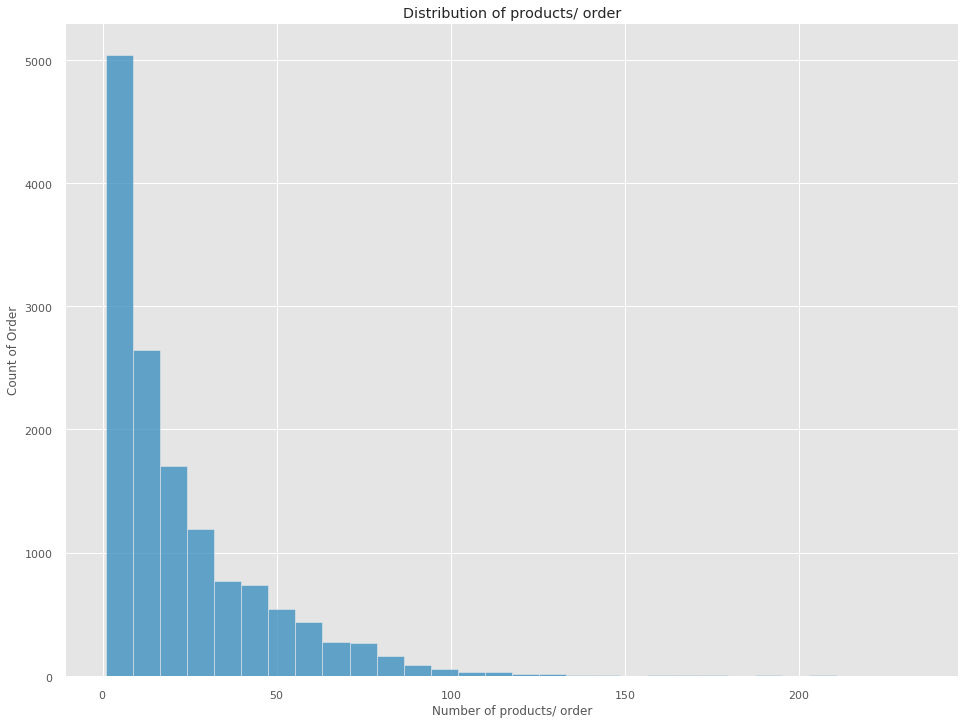

In [67]:
%matplotlib inline
plt.figure(figsize=(16, 12))
plt.style.use('ggplot')

ax = sns.histplot(data=user_history_summary, x="products_ordered", bins=30)
ax.set(xlabel='Number of products/ order', ylabel='Count of Order', title='Distribution of products/ order')
#ax.set(ylim=(20, 60))
#ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
fig = ax.get_figure()


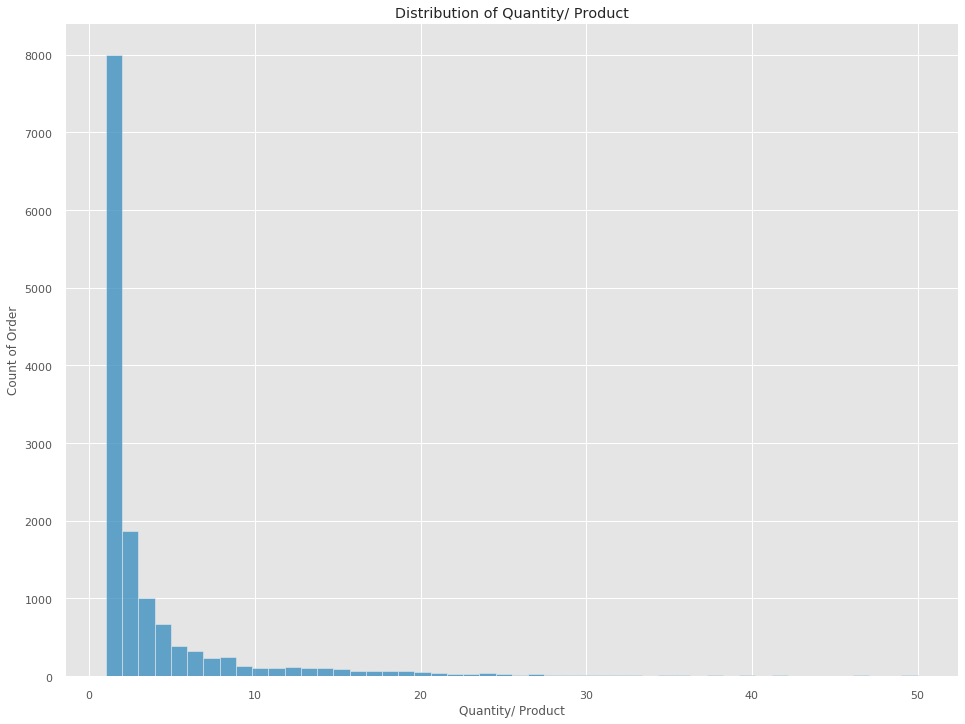

In [76]:
%matplotlib inline
plt.figure(figsize=(16, 12))
plt.style.use('ggplot')

ax = sns.histplot(data=user_history_summary.query('quantity_per_product <= 50'), x="quantity_per_product", bins=50)
ax.set(xlabel='Quantity/ Product', ylabel='Count of Order', title='Distribution of Quantity/ Product')
#ax.set(ylim=(20, 60))
#ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
fig = ax.get_figure()


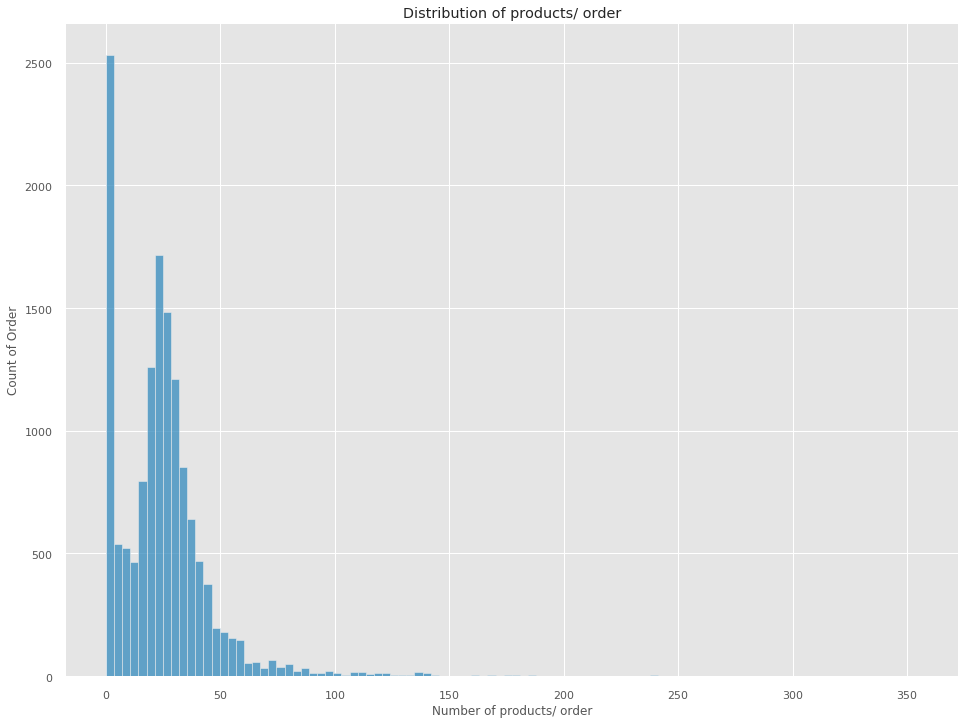

In [83]:
%matplotlib inline
plt.figure(figsize=(16, 12))
plt.style.use('ggplot')

ax = sns.histplot(data=user_history_summary, x="value_of_order", bins=100)
ax.set(xlabel='Number of products/ order', ylabel='Count of Order', title='Distribution of products/ order')
#ax.set(ylim=(20, 60))
#ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
fig = ax.get_figure()


In [109]:
product_history_summary = df.groupby(['productID']).agg(
    total_users_ordered = pd.NamedAgg(column='placedByUser_id', aggfunc='count'),
    total_no_of_order = pd.NamedAgg(column='orderID', aggfunc='count'),
    value_of_order = pd.NamedAgg(column='price', aggfunc='sum'),
    total_quantity_ordered = pd.NamedAgg(column='quantity', aggfunc='sum'),
).reset_index()


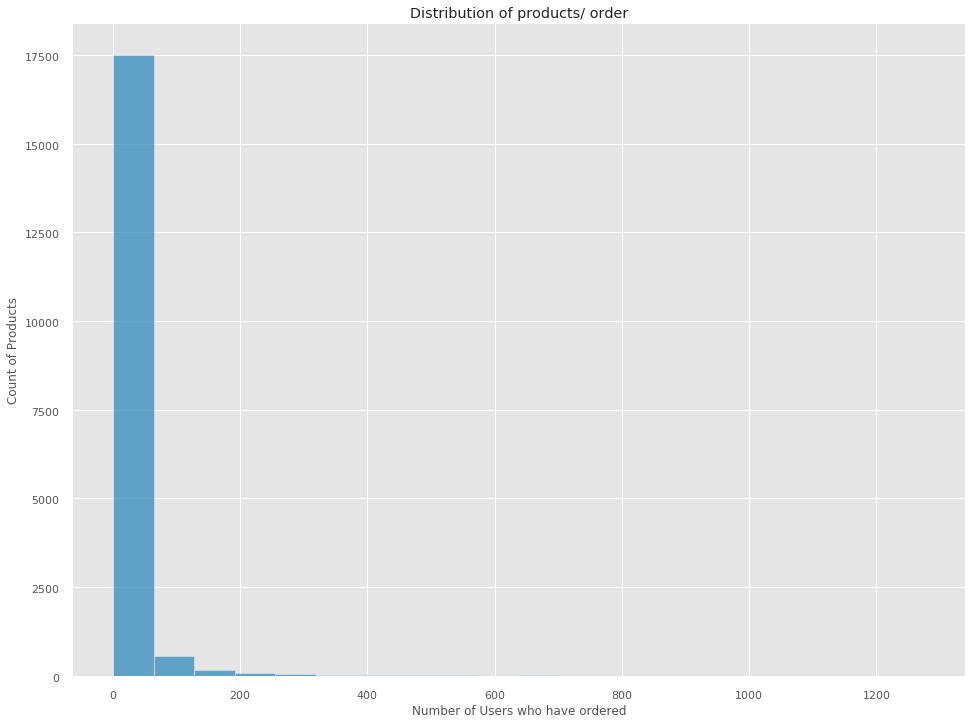

In [123]:
%matplotlib inline
plt.figure(figsize=(16, 12))
plt.style.use('ggplot')

ax = sns.histplot(data=product_history_summary, x="total_users_ordered", bins = 20)
ax.set(xlabel='Number of Users who have ordered', ylabel='Count of Products', title='Distribution of products/ order')
#ax.set(ylim=(20, 60))
#ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
fig = ax.get_figure()


In [111]:
product_history_summary.sort_values(by='total_users_ordered', ascending=False)


,productID,total_users_ordered,total_no_of_order,value_of_order,total_quantity_ordered
16823,uUsQSr4Ib6Qn081J2N06,1276,1276,14931.84,12426
9892,Wh3wziWf62pX3gid4uSP,1250,1250,24208.74,19486
4282,E7eNWO5jLHcK1nmo6cye,1240,1240,23834.56,16529
1106,3hpYbKPlXyRvquZPI96x,1189,1189,10291.32,14208
16000,rggFZSc7N1KG0SCygdcW,1188,1188,9710.81,13684
...,...,...,...,...,...
10429,YSFsRmsXBkeLOTI5pQLQ,0,1,7.50,6
8086,Qg9Lrb1kVVV9l3hQ49ZI,0,1,18.99,1
16196,sL6sQMp1CghBharzSawh,0,1,49.99,1
14293,lezd1fg8Vc6he5Vb2WFA,0,1,23.94,1


In [190]:
product_user_history = df.groupby(['productID', 'placedByUser_id', 'product_description']).agg(
    total_no_of_order = pd.NamedAgg(column='orderID', aggfunc='count'),
    value_of_order = pd.NamedAgg(column='price', aggfunc='sum'),
    total_quantity_ordered = pd.NamedAgg(column='quantity', aggfunc='sum')
).reset_index()






In [191]:
product_user_history

,productID,placedByUser_id,product_description,total_no_of_order,value_of_order,total_quantity_ordered
0,005d6DvEOtAGrcXWqK8T,2uqfcPtYHyS8lIjJshzpNmKlBZj2,Small****savia Aloe Vera 20pk/16.9oz - Original,1,18.99,4
1,005d6DvEOtAGrcXWqK8T,rpGRHYHfOSOB7LmpczWeIcJGkn32,Small****savia Aloe Vera 20pk/16.9oz - Original,2,37.98,8
2,00GcWM9rlfkxHzRTB2w3,c5YizuDDitVz7IBn3xPbt9QcQli1,Preserves Damson Plum,1,39.00,1
3,00sodUf9w98QTb39bEVH,u4L2qK3Dmle4q3nq6xU0JNjWsLN2,Mini Oreo,1,12.48,1
4,00xBw0Z6NvHHMsrOli8N,YBLX1TPrSyNizSK9mVZ8sc0asSt2,Organic Marinara Sauce,2,107.04,3
...,...,...,...,...,...,...
68176,zyrRHAcEvlJ2HOlZhtw1,zJ0dIzGZ11VjUARvZLYrYJ7nNAn2,Organic Cane Sugar,1,31.20,1
68177,zzCiyRvRJ484dDKIitmU,a6X3GujkHbX5uZeqVBHjbHFganc2,Cacao Paste,1,9.00,3
68178,zztOg5esPPwpoBOaM3O5,F9JpJHnbIge30V0a3x1Ud0YbQ0p2,Lid Clear Deli Container 8-32 Oz,1,29.99,1
68179,zztOg5esPPwpoBOaM3O5,mj9iywQ9d7MKcuR05wzWmI2wHQ82,Lid Clear Deli Container 8-32 Oz,2,59.98,2


In [236]:
test_matrix = product_user_history.pivot_table(index='placedByUser_id',columns='product_description',values='total_no_of_order').fillna(0)


In [ ]:
X = test_matrix.T
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=12, random_state=5)
resultant_matrix = SVD.fit_transform(X)
resultant_matrix.shape
corr_mat = np.corrcoef(resultant_matrix)
corr_mat.shape


In [ ]:
col_idx = test_matrix.columns.get_loc("Organic Matcha Latte")
corr_specific = corr_mat[col_idx]
pd.DataFrame({'corr_specific':corr_specific, 'Product Name': test_matrix.columns})\
.sort_values('corr_specific', ascending=False)\
.head(10)



In [246]:
sparse_mat_user_product = csr_matrix(test_matrix.values)
sparse_mat_user_product


<369x16974 sparse matrix of type '<class 'numpy.float64'>'
	with 65898 stored elements in Compressed Sparse Row format>

In [247]:
from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric='cosine',algorithm='brute', n_neighbors=20, n_jobs=-1)


In [249]:
model_knn.fit(sparse_mat_user_product)
distances, indices = model_knn.kneighbors(sparse_mat_user_product)

indices

array([[  0,  30, 226, ..., 187, 284,  12],
       [  1, 196, 192, ...,  23, 127, 315],
       [  2, 220,  30, ..., 184, 226, 186],
       ...,
       [366,  54, 268, ..., 161, 332, 130],
       [367, 115,  77, ...,  55,  82, 274],
       [368, 209, 139, ..., 114, 133,  70]])

(16974, 16974)

,corr_specific,Product Name
11305,1.000000,Organic Matcha Latte
6110,0.984190,Ginger Lemon Antioxident
11296,0.976609,Organic Maca Cold Brew
11086,0.964690,Organic Cold Brew Coffee Protein
11128,0.964530,Organic Dark Chocolate Protein
11297,0.958808,Organic Maca Mocha
8963,0.949817,Marin Cheese Sliced American
15741,0.927265,Turmeric Pear Antioxident
3926,0.900502,Coffee
10623,0.894496,Org Antioxidant Detox
